                                    Name: Tashrif Ahmned (236448)
                                    Name: Muhammad Shahadat Hossain (249454)
                                    Group: 30 (Chooser Option)
The assignment is structured into two distinct parts Historical stock and option pricing


Part I: Historical Stock Analysis
1. Import and visualize stock price data
2. Calculate and plot return
3. Determine mean,standard deviation for daily and annualy
4. Histogram with PDF to examin return 

Part II: Option pricing using Black-scholes Model
1. Apply the Black-scholes model to price chooser option for two different durations
    3 months
    6 months



In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Ford Motor Company Stock Analysis (F)
## 5 Year (2018-2022)

In [2]:
# Fetch data for 5 years
F=yf.download("F",start="2018-01-01", end="2022-12-31")


[*********************100%%**********************]  1 of 1 completed


In [3]:
F.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,12.52,12.66,12.50,12.66,9.136112,20773300
2018-01-03,12.68,12.80,12.67,12.76,9.208279,29765600
2018-01-04,12.78,13.04,12.77,12.98,9.367041,37478200
2018-01-05,13.06,13.22,13.04,13.20,9.525805,46121900
2018-01-08,13.21,13.22,13.11,13.15,9.489721,33828300


In [4]:
F = yf.download("F", start="2018-01-01", end="2022-12-31")['Adj Close']
data5y = pd.DataFrame(F).dropna()  # Drop any row with NaN value

[*********************100%%**********************]  1 of 1 completed


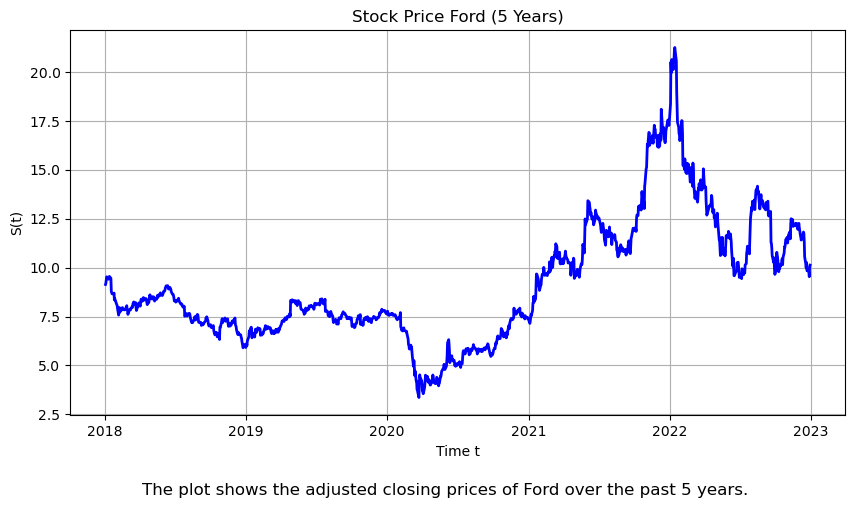

In [5]:
# Plot stock price for 5 years
plt.figure(figsize=(10, 5))
plt.plot(data5y, 'b', linewidth=2.0)
plt.title('Stock Price Ford (5 Years)')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the adjusted closing prices of Ford over the past 5 years.", ha="center", fontsize=12)
plt.show()


stock price has shown significant volatility, Fluctuation between approx 3 to 20. A notable peak accoure in early 2022,with the stock price exceeding 20 .Major dip were obsereved around early 2020 with price dropping to arround $4.in the last year the stock has been relatively volatile, hovering around 10 indicating ongoing market stability

In [6]:
# Calculate daily returns
data5y['Return'] = np.log(data5y / data5y.shift(1)).dropna()

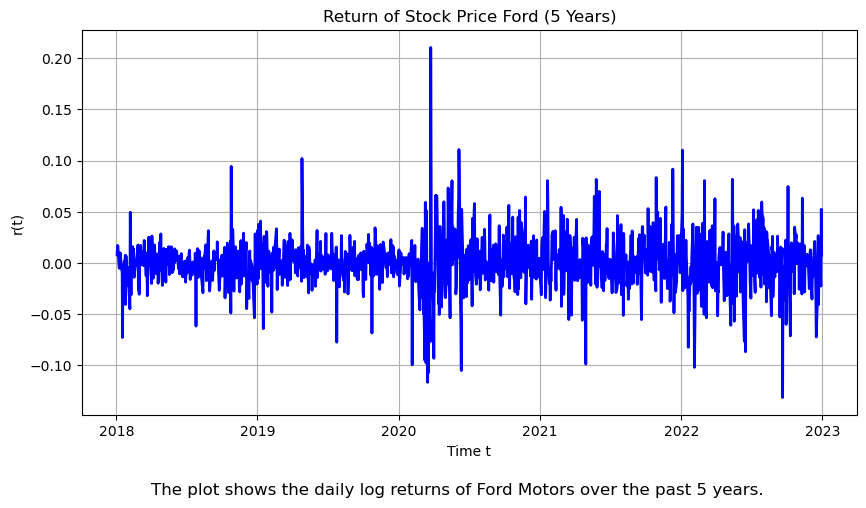

In [7]:
# Plot daily returns for 5 years
plt.figure(figsize=(10, 5))
plt.plot(data5y['Return'], 'b', linewidth=2.0)
plt.title('Return of Stock Price Ford (5 Years)')
plt.xlabel('Time t')
plt.ylabel('r(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the daily log returns of Ford Motors over the past 5 years.", ha="center", fontsize=12)
plt.show()

The log returns of Ford's stock show high volatility, with daily returns ranging between approximately -0.10 and 0.20. Significant spikes in returns are evident around early 2020 and early 2022, reflecting periods of high market activity. Despite these spikes, the returns generally hover around zero, indicating mean-reverting behavior

In [8]:
# Calculate mean and standard deviation of daily and annual returns
m5d = np.mean(data5y['Return'])
m5a = m5d * 252
s5d = np.std(data5y['Return'])
s5a = s5d * np.sqrt(252)

print("Mean of daily returns (5 years):", m5d)
print("Annual mean of returns (5 years):", m5a)
print("Standard deviation of daily returns (5 years):", s5d)
print("Annual standard deviation of returns (5 years):", s5a)

Mean of daily returns (5 years): 8.172479159325733e-05
Annual mean of returns (5 years): 0.020594647481500847
Standard deviation of daily returns (5 years): 0.026384568004791064
Annual standard deviation of returns (5 years): 0.41884203234329287


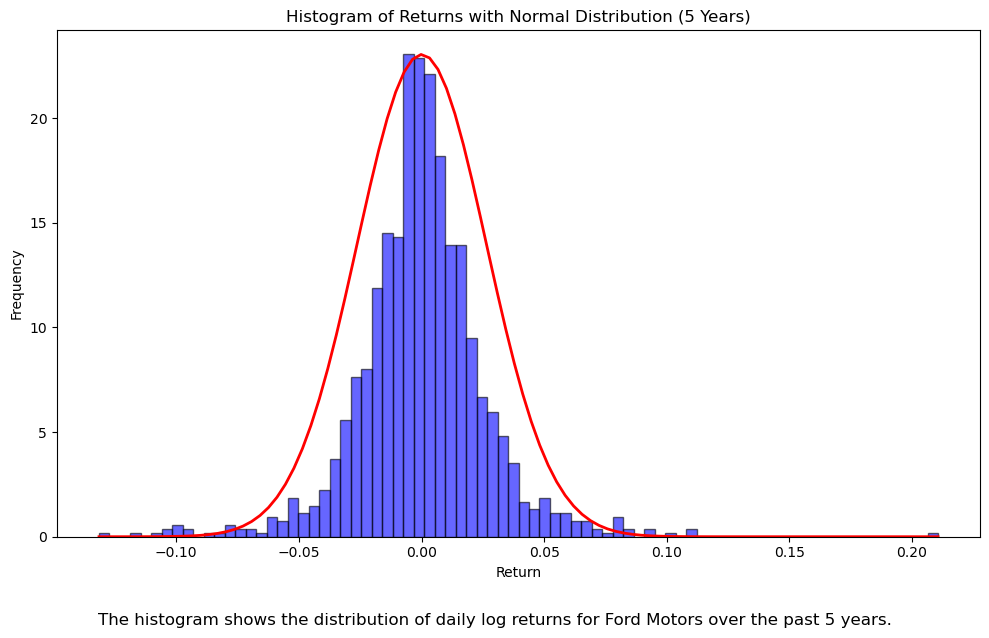

In [9]:
plt.figure(figsize=(10, 6))
binN = 80

hist_data, bin_edges, _ = plt.hist(data5y['Return'], bins=binN, density=True, color='blue', alpha=0.6, edgecolor='black')
max_height = np.max(hist_data)
x = np.linspace(min(bin_edges), max(bin_edges), 100)
plt.plot(x, norm.pdf(x, m5d, s5d) * max_height / norm.pdf(m5d, m5d, s5d), 'r', linewidth=2)

plt.title('Histogram of Returns with Normal Distribution (5 Years)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.05, "The histogram shows the distribution of daily log returns for Ford Motors over the past 5 years.", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

The x-axis represent the range of returns,while y-axis represent the normale frequency of these returns(probabilty density).the red line represent the normal distribution with the same mean(m5d) and standard deviation(s5d) as the historical return

The histogram of Ford's daily log returns over five years reveals a concentration near zero, indicating stability around the mean. The normal distribution overlay fits well, but the thicker tails suggest occasional extreme returns

## 3 Year (2018-2020)

In [10]:
# Fetch data for 3 years
F = yf.download("F", start="2018-01-01", end="2020-12-31")['Adj Close']
data3y = pd.DataFrame(F).dropna()

[*********************100%%**********************]  1 of 1 completed


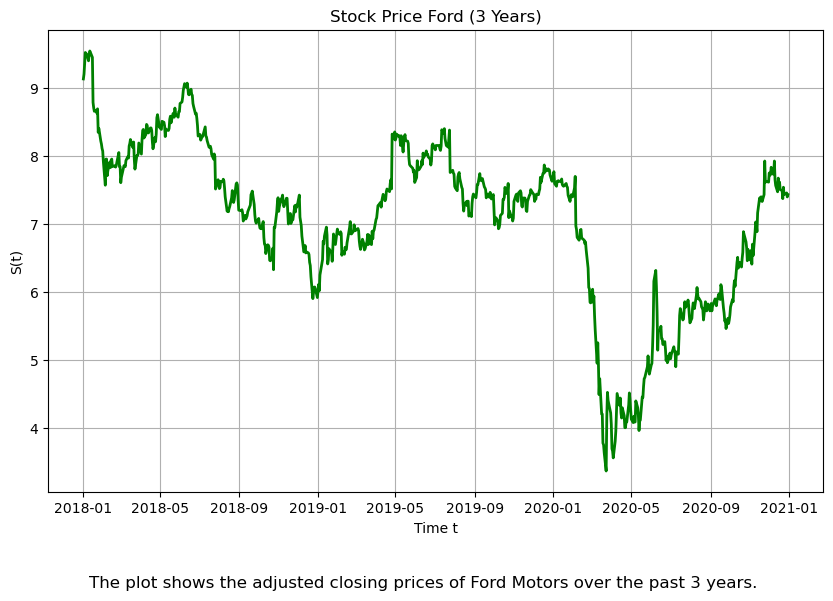

In [11]:
# Plot stock price for 3 years
plt.figure(figsize=(10, 6))
plt.plot(data3y, 'g', linewidth=2.0)
plt.title('Stock Price Ford (3 Years)')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the adjusted closing prices of Ford Motors over the past 3 years.", ha="center", fontsize=12)
plt.show()

The stock price exhibits a significant amount of volatility. The stock price started at around Doller 9 at the beginning of the period and fluctuated between Dollar (4 and 9) throughout the 3 years.Notable drops can be seen around early 2020, possibly due to market-wide events and than a recovery phase towards the end of the observed period.The stock price exhibits a significant amount of volatility.

In [12]:
# Calculate daily returns
data3y['Return'] = np.log(data3y / data3y.shift(1)).dropna()

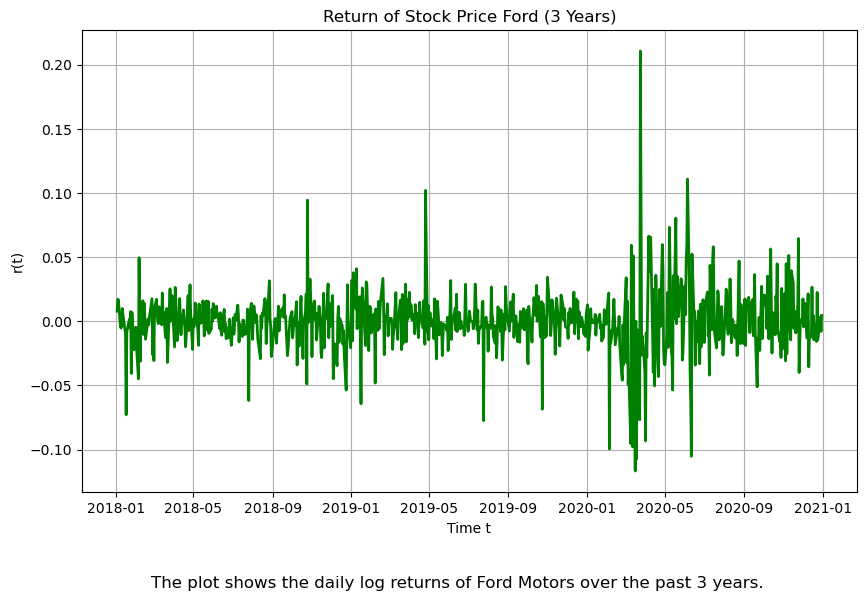

In [13]:
# Plot daily returns for 3 years
plt.figure(figsize=(10, 6))
plt.plot(data3y['Return'], 'g', linewidth=2.0)
plt.title('Return of Stock Price Ford (3 Years)')
plt.xlabel('Time t')
plt.ylabel('r(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the daily log returns of Ford Motors over the past 3 years.", ha="center", fontsize=12)
plt.show()

significant volatility with notable spikes indicating period for high price fluctuation, most daily return clustured around zero, suggesting small day to day price changes. extreme outliers, particularly in early 2020, showing large positive and negative returns likely due to major market events.

In [14]:
# Statistical Analysis of Returns
# Calculate mean and standard deviation of daily and annual returns
m3d = np.mean(data3y['Return'])
m3a = m3d * 252
s3d = np.std(data3y['Return'])
s3a = s3d * np.sqrt(252)

print("Mean of daily returns (3 years):", m3d)
print("Annual mean of returns (3 years):", m3a)
print("Standard deviation of daily returns (3 years):", s3d)
print("Annual standard deviation of returns (3 years):", s3a)

Mean of daily returns (3 years): -0.00027365567601847057
Annual mean of returns (3 years): -0.06896123035665458
Standard deviation of daily returns (3 years): 0.024676718001901778
Annual standard deviation of returns (3 years): 0.3917307540378169


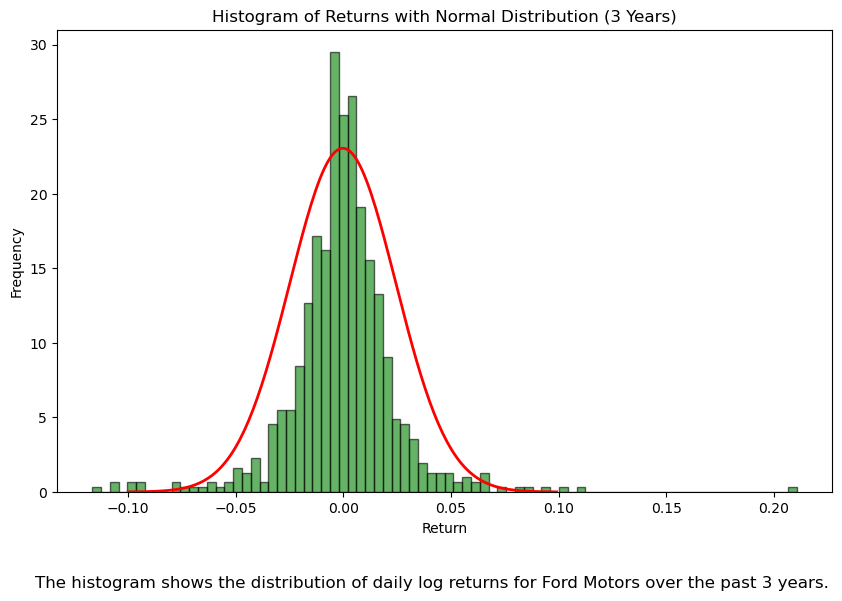

In [15]:
# Plot histogram of returns with normal distribution overlay for 5 years
plt.figure(figsize=(10, 6))
binN = 80
x = np.arange(-0.1, 0.1, 0.001)
plt.plot(x, norm.pdf(x, m3d, s3d) * max_height / norm.pdf(m3d, m3d, s3d), 'r', linewidth=2)
hist_data = plt.hist(data3y['Return'], bins=binN, density=True, color='green', alpha=0.6, edgecolor='black')

plt.title('Histogram of Returns with Normal Distribution (3 Years)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.05, "The histogram shows the distribution of daily log returns for Ford Motors over the past 3 years.", ha="center", fontsize=12)
plt.show()

The x-axis represent the range of returns,while y-axis represent the normale frequency of these returns(probabilty density).the red line represent the normal distribution with the same mean(m3d) and standard deviation(s3d) as the historical return

The last three years appears nearly normal, as shown by the added normal curve. The majority of returns center around zero, peaking between -0.025 and 0.025. There is a slight tilt towards more positive returns, with a longer tail on that side. Very high or very low returns are uncommon, suggesting that the data remains stable and follows a consistent pattern over time.

##  1 Year (2018)

In [16]:
# Fetch data for 1 year
F = yf.download("F", start="2018-01-01", end="2018-12-31")['Adj Close']
data1y = pd.DataFrame(F).dropna()

[*********************100%%**********************]  1 of 1 completed


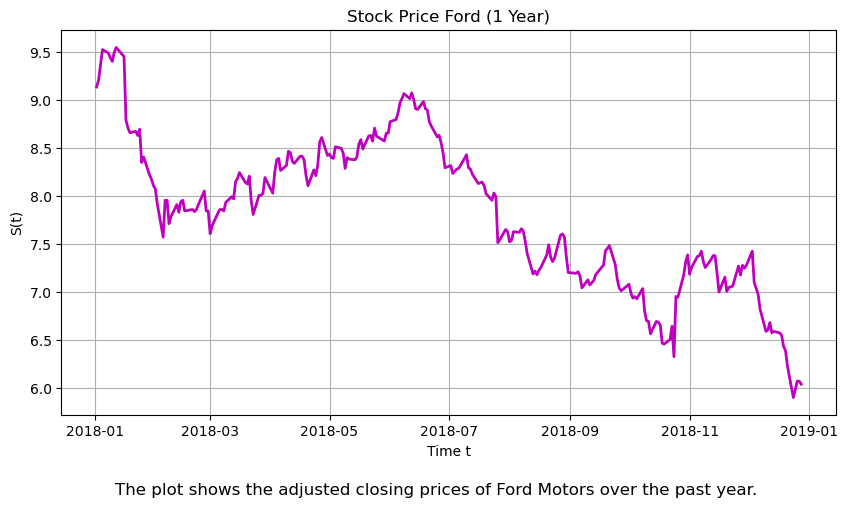

In [17]:
# Plot stock price for 1 year
plt.figure(figsize=(10, 5))
plt.plot(data1y, 'm', linewidth=2.0)
plt.title('Stock Price Ford (1 Year)')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the adjusted closing prices of Ford Motors over the past year.", ha="center", fontsize=12)
plt.show()

The Stock price starting arounf doller 9.5, the stock saw a steep drop to dollar 7.5 by March 2018. From March to september, prices fluctuated, generally staying between dollar (7.5 to 8.5). Howerver, from september onward, there was a notable downward tren, leadinf to a low of around dollar 6 by year-end. This trend highlightsa substantial decline in stock price throughout 2018, reflecting a challenging year for the company.

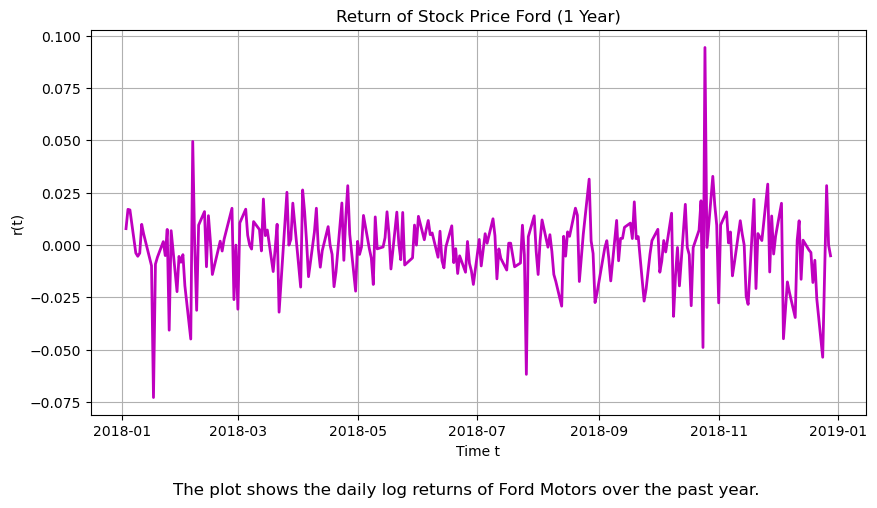

In [18]:
# Calculate daily returns
data1y['Return'] = np.log(data1y / data1y.shift(1)).dropna()

# Plot daily returns for 1 year
plt.figure(figsize=(10, 5))
plt.plot(data1y['Return'], 'm', linewidth=2.0)
plt.title('Return of Stock Price Ford (1 Year)')
plt.xlabel('Time t')
plt.ylabel('r(t)')
plt.grid(True)
plt.figtext(0.5, -0.05, "The plot shows the daily log returns of Ford Motors over the past year.", ha="center", fontsize=12)
plt.show()

Most return cluster closely around zero, indicating frequent small gains and losses. Notably spike in early March and November 2018 days with significant negative and positive returns. Overall volitility appears consistent throughout the year, with no prolong periods of extrem returns. The stock generally follows a standard market behavior.

In [19]:
# Calculate mean and standard deviation of daily and annual returns
m1d = np.mean(data1y['Return'])
m1a = m1d * 252
s1d = np.std(data1y['Return'])
s1a = s1d * np.sqrt(252)

print("Mean of daily returns (1 year):", m1d)
print("Annual mean of returns (1 year):", m1a)
print("Standard deviation of daily returns (1 year):", s1d)
print("Annual standard deviation of returns (1 year):", s1a)

Mean of daily returns (1 year): -0.0016611335031726376
Annual mean of returns (1 year): -0.4186056427995047
Standard deviation of daily returns (1 year): 0.01716106132091999
Annual standard deviation of returns (1 year): 0.2724234029345034


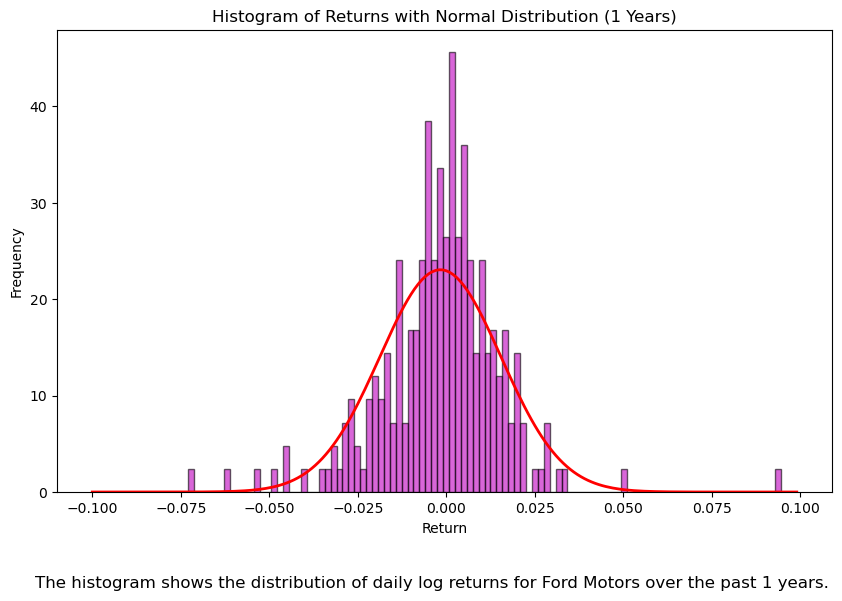

In [21]:
# Plot histogram of returns with normal distribution overlay for 1 years
plt.figure(figsize=(10, 6))
binN = 100
x = np.arange(-0.1, 0.1, 0.001)
plt.plot(x, norm.pdf(x, m1d, s1d) * max_height / norm.pdf(m1d, m1d, s1d), 'r', linewidth=2)
hist_data = plt.hist(data1y['Return'], bins=binN, density=True, color='m', alpha=0.6, edgecolor='black')

plt.title('Histogram of Returns with Normal Distribution (1 Years)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.05, "The histogram shows the distribution of daily log returns for Ford Motors over the past 1 years.", ha="center", fontsize=12)
plt.show()

The x-axis represent the range of returns,while y-axis represent the normale frequency of these returns(probabilty density).the red line represent the normal distribution with the same mean(m1d) and standard deviation(s1d) as the historical return

Most returns concentrate around zero, peaking between -0.025 and 0.025, indicating frequent small fluctuations. A slight negative skew is observed, with a longer tail on left side, indicating more negative returns compared to positve. Extreme returns, both positve and negative are uncommon, with lower frequencies at the distribution tails.

# Part II: Option Pricing Using Black-Scholes Model

In [22]:
# Given parameters for 3 months
S0 = 12.54
K = 11.82
rf = 0.0433
T = 0.25
vol_call = 0.3154
vol_put = 0.3203

In [23]:
# Black-Scholes formula
d1 = (np.log(S0 / K) + (rf + 0.5 * vol_call**2) * T) / (vol_call * np.sqrt(T))
d2 = d1 - vol_call * np.sqrt(T)

# Call option price
call_price = S0 * norm.cdf(d1) - K * np.exp(-rf * T) * norm.cdf(d2)
print("Call Option Price:", call_price)

# Black-Scholes formula put
d1_put = (np.log(S0 / K) + (rf + 0.5 * vol_put**2) * T) / (vol_put * np.sqrt(T))
d2_put = d1_put - vol_put * np.sqrt(T)

# Put option price
put_price = K * np.exp(-rf * T) * norm.cdf(-d2_put) - S0 * norm.cdf(-d1_put)
print("Put Option Price:", put_price)

Call Option Price: 1.2586491785300975
Put Option Price: 0.42209639354829287


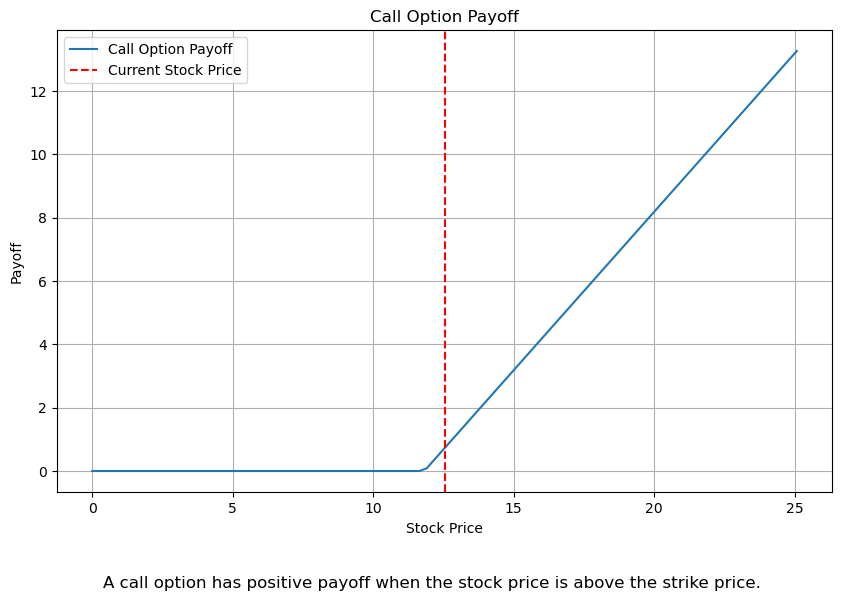

For the 3-month period:
- The call option is in-the-money as the stock price 12.54 is higher than the strike price 11.82


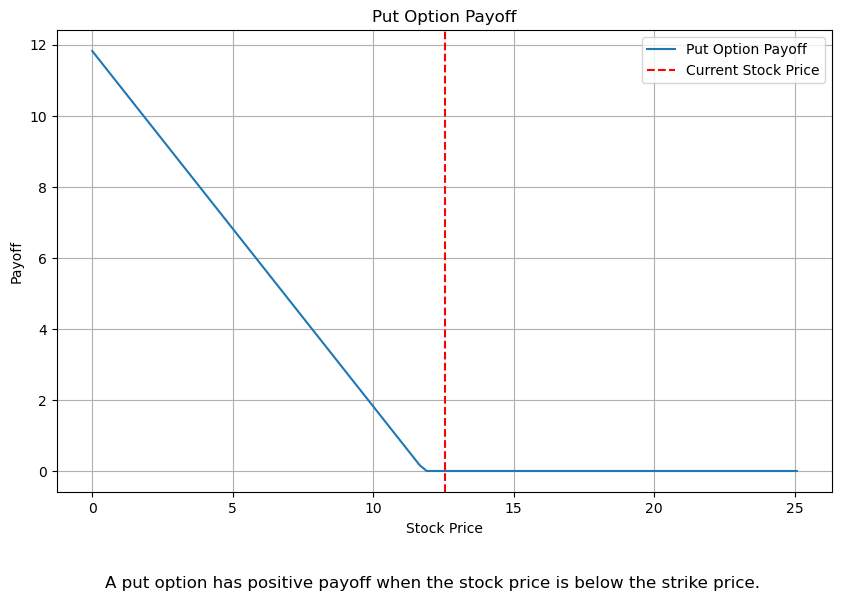

For the 3-month period:
- The put option  is out-the-money as the stock price 12.54 is higher than the strike price 11.82


In [24]:
# Plotting the call option payoff
S = np.linspace(0, 2*S0, 100)  # Stock price range for plotting
call_payoff = np.maximum(S - K, 0)  # Call option payoff

plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='Call Option Payoff')
plt.axvline(x=S0, linestyle='--', color='r', label='Current Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Call Option Payoff')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05, "A call option has positive payoff when the stock price is above the strike price.", ha="center", fontsize=12)
plt.show()

print("For the 3-month period:")
print("- The call option is in-the-money as the stock price 12.54 is higher than the strike price 11.82")

# Plotting the put option payoff
put_payoff = np.maximum(K - S, 0)  # Put option payoff

plt.figure(figsize=(10, 6))
plt.plot(S, put_payoff, label='Put Option Payoff')
plt.axvline(x=S0, linestyle='--', color='r', label='Current Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Put Option Payoff')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05, "A put option has positive payoff when the stock price is below the strike price.", ha="center", fontsize=12)
plt.show()

print("For the 3-month period:")
print("- The put option  is out-the-money as the stock price 12.54 is higher than the strike price 11.82")

In [25]:
# Chooser option price is the sum of the call and put prices
chooser_option_price = call_price + put_price
print("Chooser Option Price:", chooser_option_price)

Chooser Option Price: 1.6807455720783904


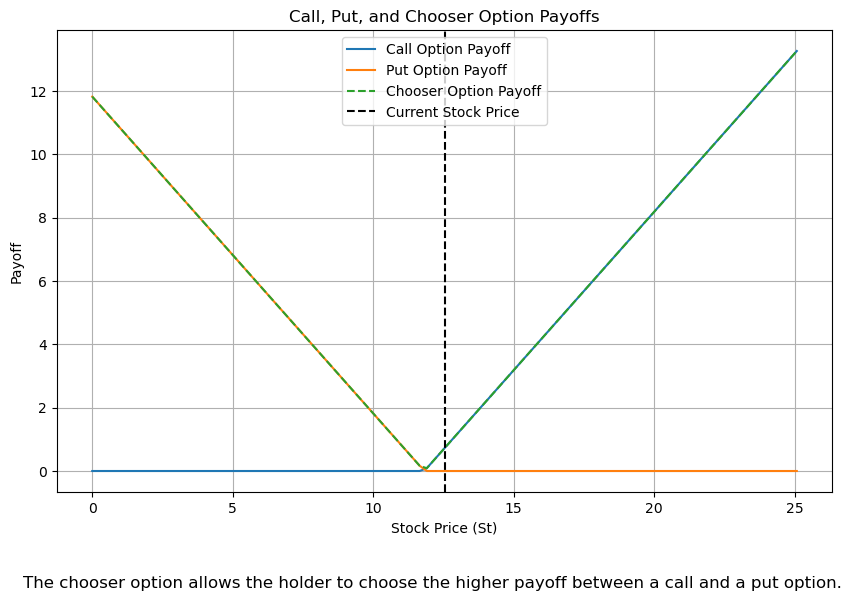

1.6807455720783904

In [26]:
# Graph of chooser option payoff
chooser_payoff = np.maximum(S - K, 0) + np.maximum(K - S, 0)  # Combined payoff

plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='Call Option Payoff')
plt.plot(S, put_payoff, label='Put Option Payoff')
plt.plot(S, chooser_payoff, label='Chooser Option Payoff', linestyle='--')
plt.axvline(x=S0, linestyle='--', color='black', label='Current Stock Price')
plt.xlabel('Stock Price (St)')
plt.ylabel('Payoff')
plt.title('Call, Put, and Chooser Option Payoffs')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05, "The chooser option allows the holder to choose the higher payoff between a call and a put option.", ha="center", fontsize=12)
plt.show()

chooser_option_price


For the 3-month period
- The call option price is 1.2568, indicating the cost to buy call option with strik price 11.82 and expiration in 3-month
- The put option price is 0.4221, indicating the cost to buy a put option with same stike price and expiration
- The chooser option 1.6807 which is the summ of call and put option price,reflects investor preference for fexibilty

In [27]:
# Parameters for 6 months
S0 = 12.54
K = 14.17
rf = 0.05
T = 0.50
vol_call = 0.3042
vol_put = 0.3062

In [28]:
# Black-Scholes for call
d1 = (np.log(S0 / K) + (rf + 0.5 * vol_call**2) * T) / (vol_call * np.sqrt(T))
d2 = d1 - vol_call * np.sqrt(T)

# Call option price
call_price = S0 * norm.cdf(d1) - K * np.exp(-rf * T) * norm.cdf(d2)
print("Call Option Price:", call_price)

# Black-Scholes for put
d1_put = (np.log(S0 / K) + (rf + 0.5 * vol_put**2) * T) / (vol_put * np.sqrt(T))
d2_put = d1_put - vol_put * np.sqrt(T)

# Put option price
put_price = K * np.exp(-rf * T) * norm.cdf(-d2_put) - S0 * norm.cdf(-d1_put)
print("Put Option Price:", put_price)

Call Option Price: 0.6015684969692399
Put Option Price: 1.888381825636828


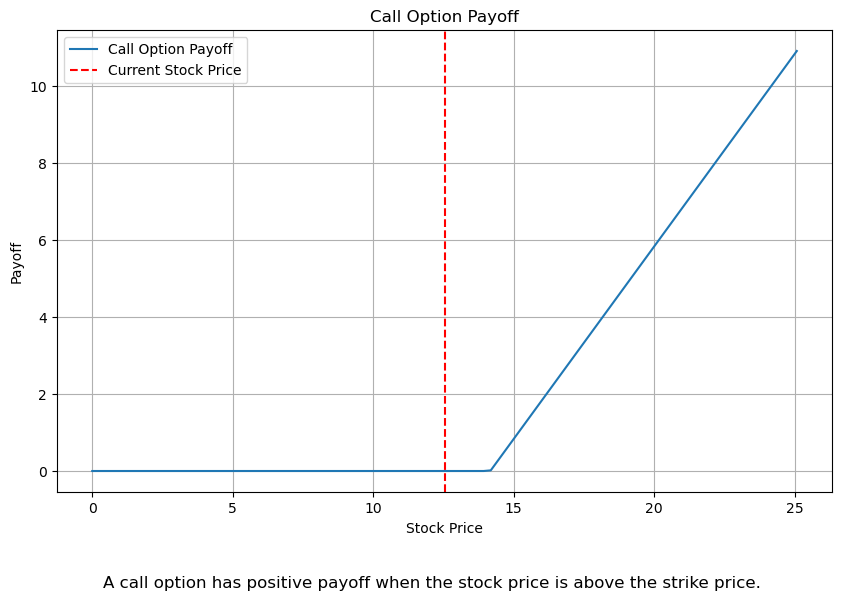

For the 6-month period:
- The call option is out-the-money as the strike price 14.17 is higher than the stock price 12.54


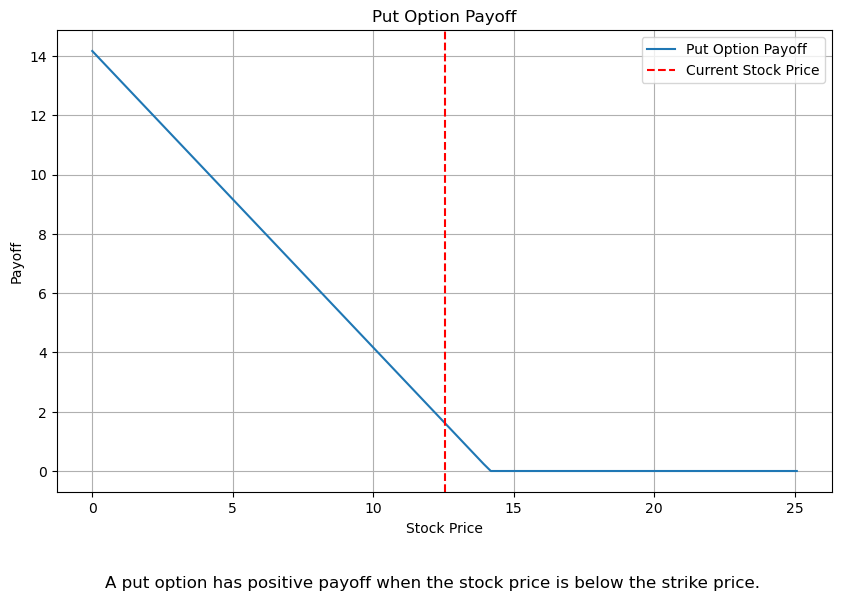

For the 6-month period:
- The put option is in-the-money as the strike price 14.17 is higher than the stock price 12.54


In [29]:
# Graph of call option payoff
S = np.linspace(0, 2*S0, 100)  # Stock price range for plotting
call_payoff = np.maximum(S - K, 0)  # Call option payoff

plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='Call Option Payoff')
plt.axvline(x=S0, linestyle='--', color='r', label='Current Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Call Option Payoff')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05, "A call option has positive payoff when the stock price is above the strike price.", ha="center", fontsize=12)
plt.show()

print("For the 6-month period:")
print("- The call option is out-the-money as the strike price 14.17 is higher than the stock price 12.54")



# Graph of put option payoff
put_payoff = np.maximum(K - S, 0)  # Put option payoff

plt.figure(figsize=(10, 6))
plt.plot(S, put_payoff, label='Put Option Payoff')
plt.axvline(x=S0, linestyle='--', color='r', label='Current Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Put Option Payoff')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05, "A put option has positive payoff when the stock price is below the strike price.", ha="center", fontsize=12)
plt.show()

print("For the 6-month period:")
print("- The put option is in-the-money as the strike price 14.17 is higher than the stock price 12.54")

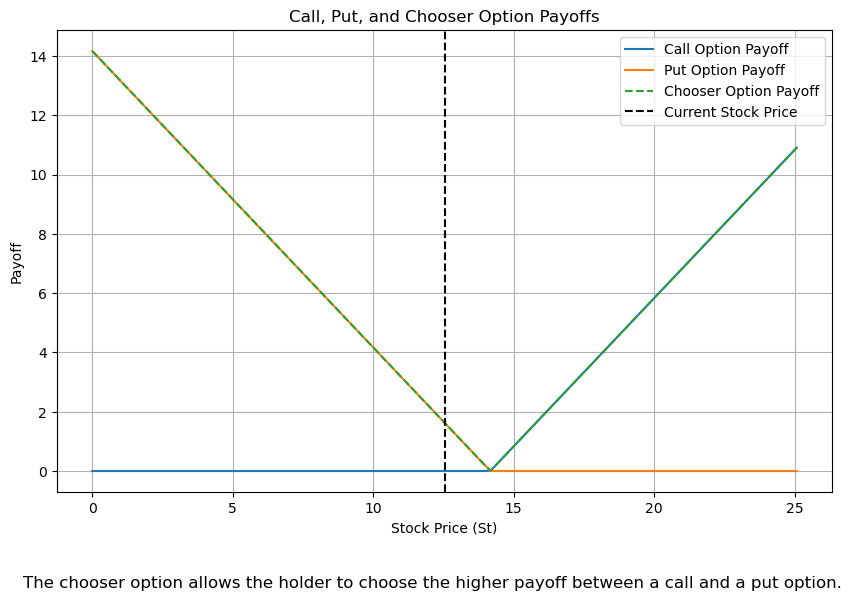

2.489950322606068

In [30]:
# Chooser option price is the sum of the call and put prices
chooser_option_price = call_price + put_price


# Plotting the chooser option payoff
chooser_payoff = np.maximum(S - K, 0) + np.maximum(K - S, 0)  # Combined payoff

plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='Call Option Payoff')
plt.plot(S, put_payoff, label='Put Option Payoff')
plt.plot(S, chooser_payoff, label='Chooser Option Payoff', linestyle='--')
plt.axvline(x=S0, linestyle='--', color='black', label='Current Stock Price')
plt.xlabel('Stock Price (St)')
plt.ylabel('Payoff')
plt.title('Call, Put, and Chooser Option Payoffs')
plt.legend()
plt.figtext(0.5, -0.05, "The chooser option allows the holder to choose the higher payoff between a call and a put option.", ha="center", fontsize=12)
plt.grid(True)
plt.show()

chooser_option_price



For the 6-month period
- The call option is 0.60156, indicating a bullish with low premium, as the stock price 12.54 is below the strike price 14.17
- The put option is 1.8883, indicating bearish with high premium or slightly higher expected volatility for downside protection
- The chooser option 2.4899, indicating uncertainity about the stock's future direction,reflects investor preference for fexibilty